# **Análisis de las partidas**

### Instalar e importar las librerias para el analisis de las partidas

In [311]:
! pip install pandas
! pip install matplotlib

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Importamos el archivo con los datos y crear el DataFrame.

In [313]:
archivo = "datos_de_jugadas.csv"
carpeta = os.path.join(os.path.realpath('..'), '..', 'registros', archivo)

In [314]:
try:
    partidas = pd.read_csv(carpeta)
except FileNotFoundError:
    print(f"No se encontro el archivo {archivo}")

### Conocer el DataFrame.

* Ver las columnas, cuantos registros tiene cada columna y el tipo de dato.

In [315]:
partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        370 non-null    float64
 1   id               370 non-null    object 
 2   evento           370 non-null    object 
 3   nombre_jugador   370 non-null    object 
 4   edad_jugador     370 non-null    int64  
 5   genero_jugador   370 non-null    object 
 6   estado           296 non-null    object 
 7   texto_ingresado  238 non-null    object 
 8   respuesta        283 non-null    object 
 9   nivel            370 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 29.0+ KB


* Conocer la estructura del dataset.

In [316]:
partidas.head(15)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Para conocer las medidas de tendencia central y de dispercion de las columnas cuantitativas del DataFrame.
* En este caso solo es útil la columna de "edad del jugador".

In [317]:
partidas.describe()

,timestamp,edad_jugador
count,3.700000e+02,370.000000
mean,1.655813e+09,57.802703
std,2.282590e+05,24.836844
min,1.655432e+09,19.000000
25%,1.655557e+09,30.000000
50%,1.655855e+09,56.000000
75%,1.656011e+09,80.000000
max,1.656100e+09,90.000000


# Estadísticas y gráficos

###  Gráfico que muestra el porcentaje de partidas por estado (error, ok, cancelado, finalizada).

* Sumar la cantidad de veces que aparece cada registro repetido en el dataset en la columna de "estado".

In [318]:
inicio = partidas[partidas['evento'].isin(['inicio_partida'])]
fin = partidas[partidas['evento'].isin(['fin'])]

In [319]:
inicio.head(3)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
11,1.655432e+09,b8d68931-5986-4704-99ac-1f606dac48ae,inicio_partida,El Jose,80,Masculino,NaN,NaN,NaN,Facil
23,1.655432e+09,3c3f6710-3cef-459e-9013-0fbaf8af05f5,inicio_partida,El Jose,80,Masculino,NaN,NaN,NaN,Facil


In [320]:
fin.head(3)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
22,1.655432e+09,b8d68931-5986-4704-99ac-1f606dac48ae,fin,El Jose,80,Masculino,finalizada,NaN,NaN,Facil
28,1.655432e+09,3c3f6710-3cef-459e-9013-0fbaf8af05f5,fin,El Jose,80,Masculino,cancelada,NaN,NaN,Facil
30,1.655495e+09,e1edc516-b996-42e9-97c3-a56a4080eaab,fin,NEO,80,Masculino,cancelada,NaN,NaN,Personalizado


In [321]:
len(inicio)

44

In [322]:
len(fin)

43

In [323]:
estado = partidas['estado'].value_counts()
estado

error         196
ok             57
finalizada     35
cancelada       8
Name: estado, dtype: int64

In [324]:
sin_fin = len(inicio) - len(fin)
nuevo_estado = pd.Series([sin_fin], index=["sin fin"])

estado = estado.append(nuevo_estado)
estado

C:\Users\Lucas Arrigoni\AppData\Local\Temp\ipykernel_6676\2635015528.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estado = estado.append(nuevo_estado)


error         196
ok             57
finalizada     35
cancelada       8
sin fin         1
dtype: int64

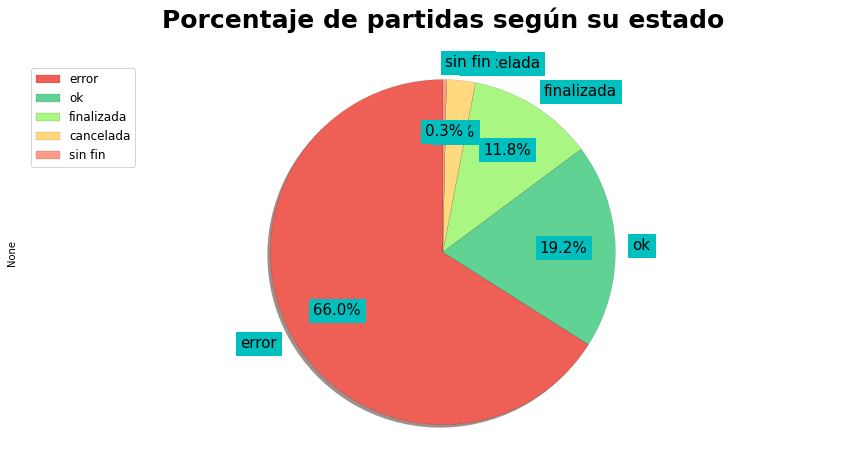

In [325]:
colores = ["#EE6055", "#60D394", "#AAF683", "#FFD97D", "#FF9B85"]

estado.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
            pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
            textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas según su estado", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Cálculo con los registros de partidas "finalizada" o "cancelada".

In [326]:
estado_fin = estado[['finalizada', 'cancelada', 'sin fin']]

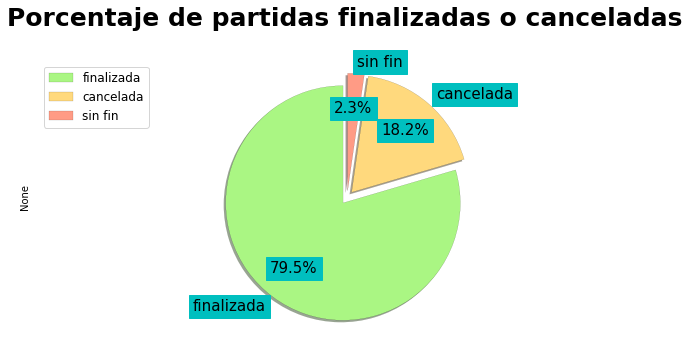

In [327]:
colores = ["#AAF683", "#FFD97D", "#FF9B85"]
explode = 0.07, 0.07, 0.07

estado_fin.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(11, 5),
                pctdistance=0.7, radius=1.2, shadow=True, colors=colores, explode=explode,
                textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
                wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas o canceladas", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Cálculo con los registros con rondas por "error" o "ok".

In [328]:
estado_respuestas = estado[['error', 'ok']]

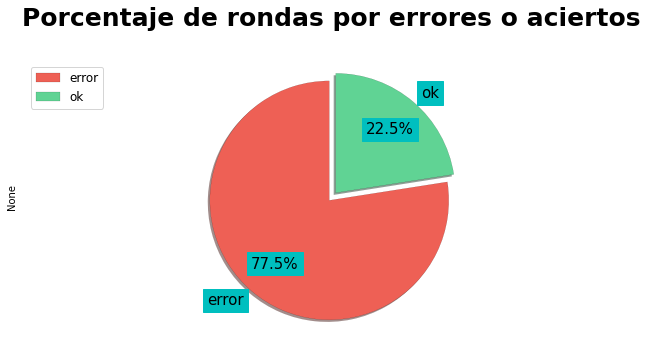

In [329]:
colores = ["#EE6055", "#60D394"]
explode = 0,0.1

estado_respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(11, 5),
                       pctdistance=0.7, radius=1.2, shadow=True, colors=colores, explode=explode,
                       textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
                       wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de rondas por errores o aciertos", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Duración total de la partida (desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).

In [330]:
partidas.head(12)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Separar en dos DataFrame los inicios de partida y los fin de partida.
1. Seleccionar las columnas que necesitamos.
2. Filtrar en dos DataFrames los inicios y fin de partida segun el "evento".
3. Cambiar el nombre de la columna timestamp por el nombre del evento de cada DataFrame.
4. Eliminar la columna evento que ya no se necesita.

In [331]:
columnas = partidas[['id', 'timestamp', 'evento']]

inicio = columnas[columnas['evento'].isin(['inicio_partida'])]
fin = columnas[columnas['evento'].isin(['fin'])]

inicio = inicio.rename(columns={'timestamp': 'tiempo_inicio'})
fin = fin.rename(columns={'timestamp': 'tiempo_fin'})

inicio = inicio.drop(columns=['evento'])
fin = fin.drop(columns=['evento'])

In [332]:
inicio.head(3)

,id,tiempo_inicio
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09
11,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09
23,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09


In [333]:
fin.head(3)

,id,tiempo_fin
22,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09
28,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09
30,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09


* Merge de las columnas de tiempo.
* En el caso del "id" va a coincidir, y en el caso de los tiempos, se va a corresponder cada uno en la linea del "id".

In [334]:
tiempos = pd.merge(inicio, fin[['id', 'tiempo_fin']], how='right')
tiempos.head(15)

,id,tiempo_inicio,tiempo_fin
0,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,1.655432e+09
1,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,1.655432e+09
2,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09,1.655495e+09
3,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,1.655525e+09
4,8bb4f470-0e9b-4584-a181-df7cf94d801d,1.655525e+09,1.655525e+09
5,0d173ffa-5cb1-4980-bb53-a21beb15b960,1.655525e+09,1.655525e+09
6,5eb7f781-192d-4851-a93b-f9ed8cd99af4,1.655525e+09,1.655526e+09
7,6b9d2661-0e18-4985-8a64-39ae8618154f,1.655526e+09,1.655526e+09
8,734bd10c-d566-450d-89c7-c3296dcb487b,1.655554e+09,1.655554e+09
9,281241cf-bbc9-42d8-9ce2-5ea4efbd7793,1.655555e+09,1.655555e+09


* Restar el tiempo_fin por el tiempo_inicio y obtener el tiempo de cada partida en segundos.
* Y agregarlo al DataFrame creando una nueva columna y ese es el tiempo que le corresponde a cada partida según su "id".

In [335]:
tiempos['duracion'] = tiempos['tiempo_fin'] - tiempos['tiempo_inicio']
tiempos.head(15)

,id,tiempo_inicio,tiempo_fin,duracion
0,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,1.655432e+09,32.292118
1,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,1.655432e+09,13.458615
2,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09,1.655495e+09,2.230888
3,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,1.655525e+09,64.529064
4,8bb4f470-0e9b-4584-a181-df7cf94d801d,1.655525e+09,1.655525e+09,31.441335
5,0d173ffa-5cb1-4980-bb53-a21beb15b960,1.655525e+09,1.655525e+09,122.371170
6,5eb7f781-192d-4851-a93b-f9ed8cd99af4,1.655525e+09,1.655526e+09,27.083303
7,6b9d2661-0e18-4985-8a64-39ae8618154f,1.655526e+09,1.655526e+09,20.756703
8,734bd10c-d566-450d-89c7-c3296dcb487b,1.655554e+09,1.655554e+09,15.560828
9,281241cf-bbc9-42d8-9ce2-5ea4efbd7793,1.655555e+09,1.655555e+09,12.928923


### Gráfico que muestra el porcentaje de partidas finalizadas según nivel.

* Sumar la cantidad de veces que aparece cada registro repetido en el dataset en la columna de "nivel".

In [336]:
estado_finalizadas = partidas[partidas['estado'] == 'finalizada']
nivel = estado_finalizadas.groupby('nivel')
nivel = nivel.size()

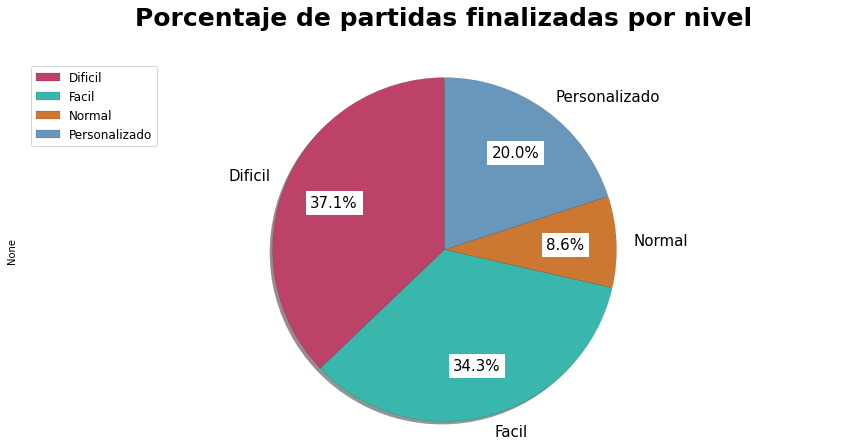

In [337]:
colores = ["#BD4267", "#39B7AC", "#CC7832", "#6897BB", "#AAF683", "#FFD97D"]

nivel.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
           pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
           textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'white'},
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas por nivel", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Promedio de tiempo de partidas finalizadas por nivel.

In [338]:
partidas.head(12)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil


* Separar en dos DataFrame los "inicios de partida" y los "fin de partida", pero ahora con el estado y nivel para calcular.
1. Seleccionar las columnas que necesitamos.
2. Filtrar en dos DataFrames los inicios y fin de partida segun el "evento".
3. Cambiar el nombre de la columna timestamp por el nombre del evento de cada DataFrame.

In [339]:
columnas = partidas[['id', 'timestamp', 'evento', 'estado', 'nivel']]

inicio = columnas[columnas['evento'].isin(['inicio_partida'])]
fin = columnas[columnas['evento'].isin(['fin'])]

inicio = inicio.rename(columns={'timestamp': 'tiempo_inicio'})
fin = fin.rename(columns={'timestamp': 'tiempo_fin'})

In [340]:
inicio.head(3)

,id,tiempo_inicio,evento,estado,nivel
0,db74505f-3fe3-476c-866d-872fea96a3b2,1.655432e+09,inicio_partida,NaN,Facil
11,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,inicio_partida,NaN,Facil
23,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,inicio_partida,NaN,Facil


In [341]:
fin.head(3)

,id,tiempo_fin,evento,estado,nivel
22,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,fin,finalizada,Facil
28,3c3f6710-3cef-459e-9013-0fbaf8af05f5,1.655432e+09,fin,cancelada,Facil
30,e1edc516-b996-42e9-97c3-a56a4080eaab,1.655495e+09,fin,cancelada,Personalizado


* Merge de las columnas.
>* En el caso de las columnas de "id" y "nivel" coinciden en las lineas.
>* De ambos DataFrames nos interesa unir el valor del tiempo de inicio y fin, así que se unen en la misma linea que coincida el "id" y "nivel".
>* En el caso de la columna de "estado" solo hacer merge del "estado" del DataFrame de fin para saber si el estado de la partida fue finalizado o cancelado, en el caso del DataFrame de inicio la columna "estado" no sirve para este caso.

1. Filtrar las lineas según si tiene el valor de "finalizada" que son las filas para calcular.
2. Restar el tiempo_fin por el tiempo_inicio y obtener el tiempo de cada partida en segundos.
3. Crear una nueva columna con la duración en el DataFrame.
4. Seleccionar las columnas de "nivel" y "duracion".

In [342]:
por_nivel = pd.merge(inicio[['id', 'tiempo_inicio', 'nivel']], fin[['id', 'tiempo_fin', 'nivel', 'estado']], how='left')

las_finalizadas = por_nivel[por_nivel['estado'].isin(['finalizada'])]

los_f = las_finalizadas.copy()
los_f['duracion'] = las_finalizadas['tiempo_fin'] - las_finalizadas['tiempo_inicio']

por_nivel = los_f[['nivel', 'duracion']]
los_f.head(5)

,id,tiempo_inicio,nivel,tiempo_fin,estado,duracion
1,b8d68931-5986-4704-99ac-1f606dac48ae,1.655432e+09,Facil,1.655432e+09,finalizada,32.292118
4,40d2a50d-2f04-44cc-9665-44a0f720d9a7,1.655525e+09,Normal,1.655525e+09,finalizada,64.529064
5,8bb4f470-0e9b-4584-a181-df7cf94d801d,1.655525e+09,Dificil,1.655525e+09,finalizada,31.441335
6,0d173ffa-5cb1-4980-bb53-a21beb15b960,1.655525e+09,Facil,1.655525e+09,finalizada,122.371170
7,5eb7f781-192d-4851-a93b-f9ed8cd99af4,1.655525e+09,Dificil,1.655526e+09,finalizada,27.083303


* El promedio y la tiempo total de la duración en segundos por nivel.

In [343]:
promedio = por_nivel.groupby('nivel').mean('duracion').rename(columns={'duracion': 'promedio'})
total_seg = por_nivel.groupby('nivel').sum('duracion').rename(columns={'duracion': 'total_seg'})
total_y_promedio = pd.concat([promedio, total_seg], axis=1)

total_y_promedio

,promedio,total_seg
nivel,,
Dificil,19.589348,254.661529
Facil,52.221280,626.655360
Normal,56.300306,168.900919
Personalizado,27.554431,192.881016


### Gráfico que muestra el porcentaje de partidas finalizadas según género.

1. Filtrar todas las columnas con estado "finalizada".
2. Agrupar por genero del jugador.

In [344]:
estado_finalizadas = partidas[partidas['estado'] == 'finalizada']
agrupar_genero = estado_finalizadas.groupby('genero_jugador')
agrupar_genero = agrupar_genero.size()

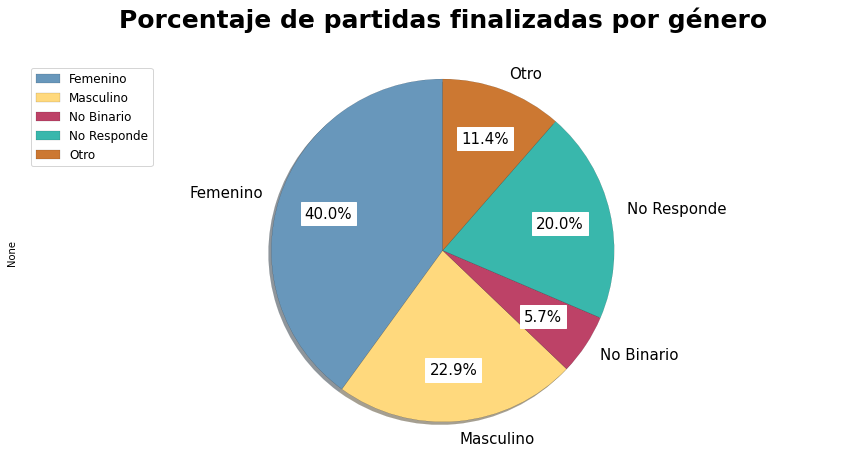

In [345]:
colores = ["#6897BB", "#FFD97D", "#BD4267", "#39B7AC", "#CC7832", "#AAF683",]

agrupar_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
                    pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
                    textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'white'},
                    wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas finalizadas por género", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

### Top 10 de palabras que se encuentran primero de todas las partidas.

* Separar en dos el DataFrame para poder restar cada linea con la anterior y poder calcular el tiempo de cada ronda.
1. Al DataFrame inicio se le elimina la última linea.
2. Al DataFrame fin se le elimina la primera linea.

In [346]:
inicio = partidas.drop(len(partidas.index) -1).reset_index()
inicio.tail(3)

,index,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
366,366,1.656100e+09,f95db774-0975-4bae-8aea-882cce7e8d49,intento,NEO,80,Masculino,error,Twilight Zone: The Movie,Teen Titans: Trouble in Tokyo,Facil
367,367,1.656100e+09,f95db774-0975-4bae-8aea-882cce7e8d49,intento,NEO,80,Masculino,error,House of the Witch,Fantastic Four,Facil
368,368,1.656100e+09,f95db774-0975-4bae-8aea-882cce7e8d49,intento,NEO,80,Masculino,error,Assassination Classroom: Graduation,Tombstone of the Fireflies,Facil


In [347]:
fin = partidas.drop(0).reset_index()
fin.head(3)

,index,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
1,2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
2,3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil


* Restar las lineas (una con su anterior), y agregar una nueva columna con la duracion de cada ronda.
> Tiene una excepción porque a los fin de partida se le resta el inicio de partida y ese da como tiempo no valido de una ronda, sino que seria el tiempo que paso desde una partida a otra. Pero para este caso, tenemos que calcular los minimos, que son de pocos segundos.

In [348]:
palabras = partidas.copy()

palabras["duracion"] = fin["timestamp"] - inicio["timestamp"]
palabras.head(15)

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel,duracion
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil,8.231454
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil,2.912129
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil,5.803136
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil,2.938909
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil,2.487448
5,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Natalie La Rose,Facil,3.411873
6,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,XXXTENTACION,Adele,Facil,2.898650
7,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Migos,Future,Facil,2.527012
8,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,pasar,NEO,80,Masculino,NaN,NaN,Taylor Swift,Facil,3.172239
9,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Daya,Iyaz,Facil,3.349771


1. Calcular las respuestas correctas "ok".
2. Calcular las 10 con menor "duracion".
3. Filtrar las columnas de "respuesta" y "duracion" para mostrar el top 10.

In [349]:
respuestas_ok = palabras[palabras["estado"] == "ok"]

respuestas_ok = respuestas_ok.nsmallest(10, 'duracion')

respuestas_ok = respuestas_ok[["respuesta", "duracion"]]

respuestas_ok

,respuesta,duracion
315,Marriage Story,1.958753
264,Tobias Kainz,2.089793
232,Dragons: Rescue Riders: Secrets of the Songwing,2.145125
233,Marriage Story,2.152889
254,Tullu Moje (Ethiopia),2.286252
24,Snoop Dogg,2.528940
12,David Guetta,2.554827
164,Ariana Grande,2.579864
234,Sissi: The Fateful Years of an Empress,2.707720
271,The Legend of Drunken Master,2.755411


### Porcentaje de palabras no encontradas en las partidas "timeout", es decir que finalizaron por falta de tiempo para completar.

* Me quedo con la cantidad de palabras, que no pudieron ser adivinadas, en el tiempo dado :

In [350]:
cant_timeout = len(partidas[partidas['evento'] == 'timeout'])

* Me quedo con la cantidad del resto de palabras, que no se quedaron sin tiempo para poder ser adivinadas o no :  

In [351]:
cant_no_timeout = len(partidas[partidas['evento'] != 'timeout'])

In [352]:
cant_total = pd.Series({'Sin Timeout': cant_no_timeout, 'Timeout': cant_timeout})

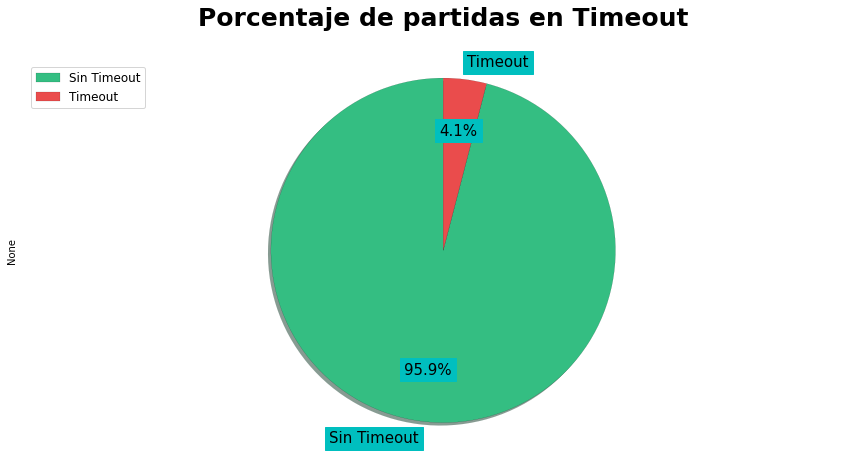

In [353]:
colores = ["#34BE82", "#EA4C4C"]

cant_total.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(15, 7),
            pctdistance=0.7, radius=1.2, shadow=True, colors=colores,
            textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
            wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de partidas en Timeout", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()

* Top 10 palabras NO encontradas por Timeout: 

In [354]:
palabras_time_out = partidas[partidas['evento'] == 'timeout']['respuesta'].value_counts()

top_10 = pd.concat([palabras_time_out[0:10]], axis=1, keys=['Cantidad'])

top_10

,Cantidad
Dragonfly,1
PAW Patrol: Jet To The Rescue,1
Lords of Scam,1
Rachid Bouhenna,1
Kwame Poku,1
Transporter 2,1
Blue Crush,1
Saint Seiya: Legend of Crimson Youth,1
The Fixies: Top Secret,1
I Give My First Love to You,1
